Exploratory Data Analysis 

Below are all the features of the dataset before I do anything.
(***Measurement are in meters***)

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

## IMPORTING

Adding in all the necessary imports to start on this project.

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve

### Importing the dataset

Adding in all of my tests and training dataset. The train-test split was already done for us prior to bringing in our data.

In [2]:
#dependent variable lables (y_train labels)
training_set_labels = pd.read_csv('./data/training_set_labels.csv')

In [3]:
#I am dropping the ID column in our y_train dataset
training_set_labels = training_set_labels['status_group']

In [4]:
#The independent variables for the training set
training_set_values = pd.read_csv('./data/training_set_values.csv')

In [5]:
# I am merging my two datasets together into 1.
df = pd.concat([training_set_values, training_set_labels], axis=1, join="outer")

In [6]:
#Sanity check, wanted to make sure it was running. 
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Now I got my dataframe, I want to check and see if there is anything I should look out for. 

In [8]:
df['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

There's an outlier in the 'amount_tsh' with our max value being 350,000. That's taller than our stratosphere. There is something wrong with this data.

In [9]:
df.amount_tsh.sort_values(ascending=False).head(7000)

10812    350000.0
22191    250000.0
22817    200000.0
45067    170000.0
9961     138000.0
           ...   
5895        500.0
3806        500.0
47160       500.0
51059       500.0
53984       500.0
Name: amount_tsh, Length: 7000, dtype: float64

I want to block out the outliers so down below, I maade a new cleaned dataframe.

In [11]:
block_outliers = df['amount_tsh'] < 4000

In [12]:
cleaned_df = df[block_outliers]

In [13]:
cleaned_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Going through our data, I noticed that quantity and quantity group looked really similiar so I went out and checked the columns.

In [14]:
cleaned_df['quantity'].value_counts()

enough          32379
insufficient    14902
dry              6205
seasonal         4024
unknown           789
Name: quantity, dtype: int64

In [15]:
cleaned_df['quantity_group'].value_counts()

enough          32379
insufficient    14902
dry              6205
seasonal         4024
unknown           789
Name: quantity_group, dtype: int64

My guess was correct. 'quantity' and 'quantity group' were exactly the same! So I decided to drop the 'quantity_group'.

In [16]:
cleaned_df = df.drop('quantity_group', axis=1)

In [17]:
cleaned_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Starting to drop off the columns. Now since I dropped my duplicates, I need to start dropping off the columns I thought were not necessary. I chose these datasets after reading the description and made the judgement that these values will not interfere with predicting my target value. 

In [18]:
cleaned_df.drop(['date_recorded','funder','wpt_name','latitude', 'longitude', 'id','recorded_by', 'num_private', 'scheme_name', 'subvillage', 'installer', 'construction_year'], axis = 1, inplace=True)

#### I am classifying my target.

In [19]:
# I am classifying my target.
cleaned_df['status_class'] = cleaned_df.status_group.map({"non functional":0, "functional needs repair":1, "functional":2})
cleaned_df

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,ward,population,public_meeting,...,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_class
0,6000.0,1390,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,...,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.0,1399,Lake Victoria,Mara,20,2,Serengeti,Natta,280,NaN,...,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
2,25.0,686,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,...,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2
3,0.0,263,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,...,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0
4,0.0,0,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,0,True,...,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,Pangani,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,...,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
59396,4700.0,1212,Rufiji,Iringa,11,4,Njombe,Ikondo,56,True,...,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2
59397,0.0,0,Rufiji,Mbeya,12,7,Mbarali,Chimala,0,True,...,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2
59398,0.0,0,Rufiji,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,...,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2


After dropping Columns, I am checking to see how many null values are in my dataset.

In [20]:
# Checking to see if I have any null values.
cleaned_df.isnull().sum().sum()

10267

In [21]:
# Sanity check to see if my df is clean.
cleaned_df

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,ward,population,public_meeting,...,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_class
0,6000.0,1390,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,...,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.0,1399,Lake Victoria,Mara,20,2,Serengeti,Natta,280,NaN,...,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
2,25.0,686,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,...,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2
3,0.0,263,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,...,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0
4,0.0,0,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,0,True,...,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,Pangani,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,...,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
59396,4700.0,1212,Rufiji,Iringa,11,4,Njombe,Ikondo,56,True,...,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2
59397,0.0,0,Rufiji,Mbeya,12,7,Mbarali,Chimala,0,True,...,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2
59398,0.0,0,Rufiji,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,...,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2


I wanted to check for any multi-collinearity, so I made a heatmap to check.

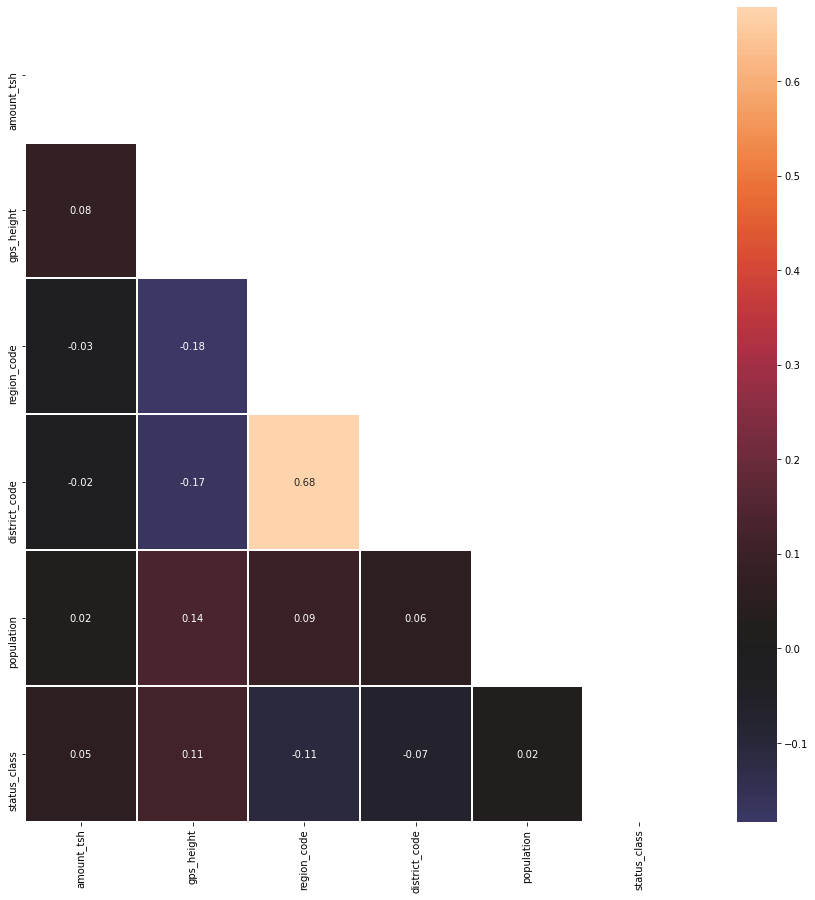

In [22]:
#Make correlation mean
corr_mean = cleaned_df.corr(method = 'pearson')

#Make sure we do't see the upper half for the heatmap.
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

#Make the actual heatmap.
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corr_mean, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels())
plt.show()

Now I want to go over each feature and see how many nulls are in each column.

In [23]:
cleaned_df.isna().sum()

amount_tsh                  0
gps_height                  0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
status_class                0
dtype: int64

All of these nulls, I will have it resolved with my pipeline with imputation with using the most frequent.

We are starting our Train-Test Split

In [26]:
X = cleaned_df.drop(['status_group','status_class'], axis=1)
y = cleaned_df['status_class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Pipeline

We are now going to start using pipelines.

In [28]:
#We have to start making our simple functions to start on our pipelines.
def grab_numeric(df):
    return df.select_dtypes(include=['float', 'int'])


def grab_object(df): 
    return df.select_dtypes(include=['object'])

In [29]:
#We are now making a function transformer so that we can fit this into our pipeline.


#Function Transformer for Numeric Values
GrabNumeric = FunctionTransformer(grab_numeric)


#Function Transformer for Object Values
GrabObject = FunctionTransformer(grab_object)

In [30]:
#We are building our pipeline here.
pipe = Pipeline(steps=[
    ('num', GrabNumeric), #for a pipeline to work, you must have a fit and a transform method.
    ('ss', StandardScaler() )
    #dont need to fit and transform our standard scaler
    
])

In [31]:
number_mini_pipeline = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])
category_mini_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [33]:
# I wanted to check my X_training set.
X_train

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,ward,population,public_meeting,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
24947,20.0,330,Wami / Ruvu,Pwani,6,1,Bagamoyo,Mbwewe,80,True,...,pay per bucket,per bucket,salty,salty,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
22630,0.0,0,Lake Victoria,Mwanza,17,1,Magu,Nkungulu,0,NaN,...,unknown,unknown,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump
13789,0.0,0,Lake Victoria,Mwanza,19,4,Kwimba,Wala,0,True,...,never pay,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump
15697,0.0,1542,Internal,Singida,13,4,Singida Urban,Mungumaji,23,True,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
22613,0.0,523,Lake Nyasa,Ruvuma,10,3,Mbinga,Mbaha,1,NaN,...,unknown,unknown,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,1000.0,327,Rufiji,Morogoro,5,4,Ulanga,Mtimbira,255,True,...,pay monthly,monthly,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe
38158,1000.0,1743,Lake Nyasa,Iringa,11,5,Ludewa,Mlangali,35,True,...,pay annually,annually,soft,good,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
860,0.0,-13,Pangani,Tanga,4,5,Pangani,Pangani Mashariki,1000,False,...,never pay,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,other,other
15795,0.0,0,Lake Victoria,Shinyanga,17,6,Meatu,Sakasaka,0,True,...,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [34]:
#I wanted to see the data types of each column.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24947 to 56422
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   basin                  44550 non-null  object 
 3   region                 44550 non-null  object 
 4   region_code            44550 non-null  int64  
 5   district_code          44550 non-null  int64  
 6   lga                    44550 non-null  object 
 7   ward                   44550 non-null  object 
 8   population             44550 non-null  int64  
 9   public_meeting         42025 non-null  object 
 10  scheme_management      41628 non-null  object 
 11  permit                 42265 non-null  object 
 12  extraction_type        44550 non-null  object 
 13  extraction_type_group  44550 non-null  object 
 14  extraction_type_class  44550 non-null  object 
 15

In [35]:
#This is a column transformer using pipelines
#I need to fix these values.
ct = ColumnTransformer(transformers = [
    ('subpipe_num', number_mini_pipeline, [0,1,4,5,8]),
    ('subpipe_cat', category_mini_pipeline, [2,3,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
])

In [36]:
#I are now fitting and transforming our pipeline on our X_train so we can work it in our
#pipeline.
pd.DataFrame(ct.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367
0,-0.093074,-0.487869,-0.529321,-0.479998,-0.209732,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.099150,-0.964042,0.092290,-0.479998,-0.379567,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.099150,-0.964042,0.205310,-0.170408,-0.379567,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.099150,1.260983,-0.133751,-0.170408,-0.330739,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.099150,-0.209380,-0.303281,-0.273604,-0.377444,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.204654,-0.492198,-0.585831,-0.170408,0.161782,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44546,0.204654,1.551016,-0.246771,-0.067211,-0.305264,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44547,-0.099150,-0.982800,-0.642341,-0.067211,1.743370,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44548,-0.099150,-0.964042,0.092290,0.035986,-0.379567,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

## Starting our models.

Building the Dummy Model.

In [38]:
dummy_model_pipeline = Pipeline(steps=[
    ('ct',ct),
    ('dummy', DummyClassifier(strategy = 'most_frequent'))
])

In [39]:
dummy_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [0, 1, 4, 5, 8]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 s

In [40]:
#Dummy Score
dummy_model_pipeline.score(X_train, y_train)

0.542334455667789

In [41]:
#We are cross validating our dummy.
dummy_model = ModelWithCV(dummy_model_pipeline, 'dummy',X_train, y_train)

In [42]:
# I am getting my accuracy score for my accuract score.
dummy_model.print_cv_summary()

CV Results for `dummy` model:
            0.54233 ± 0.00004 accuracy
        


In [43]:
#Build the Pipeline!!!
logreg_model_pipe = Pipeline(steps=[
    ('ct',ct),
    ('logreg', LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000))
])

In [44]:
#Fitting our pipeline
logreg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [0, 1, 4, 5, 8]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 s

In [46]:
#Cross validating our log pipeline
log_pipe = ModelWithCV(logreg_model_pipe, model_name = 'log_pipe', X=X_train, y=y_train)

CV Results for `log_pipe` model:
            0.76801 ± 0.00322 accuracy
        


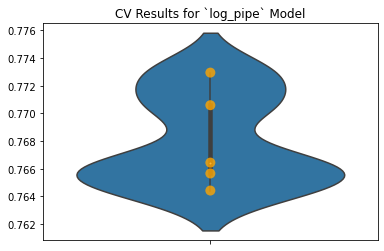

In [47]:
#Drawing in the violin Plot
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax)

#Cross val summary
log_pipe.print_cv_summary()

We are going to pickle our log reg models to save us time for the future.

In [48]:
#name we are saving the pickle
logreg_filename = 'log_reg_model.sav'

In [49]:
pickle.dump(log_pipe, open(logreg_filename, 'wb'))

In [50]:
log_reg_model_pickle = pickle.load(open('log_reg_model.sav', 'rb'))

Wanted to do a sanity check and make sure my pickle for log reg was working.

In [51]:
#Pickle Value
log_reg_model_pickle.cv_mean

0.768013468013468

In [52]:
#Cross Validating our log pipe
log_pipe.cv_mean

0.768013468013468

In [53]:
#Hyper Tuning GridSearch for Logistic Regression to find our best parameters.

params = {}

params['logreg__C'] = [10,100,1000]

params['logreg__max_iter'] = [100,500,1100]

params['logreg__penalty'] = ['l2', 'none']

In [54]:
#Cross validating our grid search
gridsearch = GridSearchCV(logreg_model_pipe, param_grid=params, cv=5, n_jobs=-3)

In [55]:
#Fitting our grid search
gridsearch.fit(X_train, y_train)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 1,
                                                                          4, 5,
                                                                          8]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('cat_impute

In [56]:
#Our score for the grid search - accuracy
gridsearch.best_score_

0.7641077441077442

We are going to do a pickle for grid search for logistic regression.

In [57]:
logreg_gridsearch_filename = 'log_reg_gridsearch.sav'

In [58]:
pickle.dump(gridsearch, open(logreg_gridsearch_filename, 'wb'))

In [59]:
log_reg_gridsearch_pickle = pickle.load(open('log_reg_gridsearch.sav', 'rb'))

We are now starting on my second model of Random Forests.

In [60]:
random_forest_classifier = RandomForestClassifier(random_state=42)

rfc_model_pipe = Pipeline([('ct', ct), ('rfc', random_forest_classifier)])

In [61]:
#We are fitting our 
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [0, 1, 4, 5, 8]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 s

In [62]:
random_forest_cv = ModelWithCV(rfc_model_pipe, 'forest_pipe', X_train, y_train)

In [63]:
#This is comparison score.
random_forest_cv.print_cv_summary()

CV Results for `forest_pipe` model:
            0.78507 ± 0.00258 accuracy
        


We are going to pickle out random forest.

In [64]:
random_forest_model_filename = 'random_forest_model.sav'

In [65]:
pickle.dump(rfc_model_pipe, open(random_forest_model_filename, 'wb'))

In [66]:
random_forest_model_pickle = pickle.load(open('random_forest_model.sav', 'rb'))

Now we are going to do a grid search for our random forests.

In [67]:
rf_params = {}

rf_params['rfc__n_estimators'] = [10, 50, 100]

rf_params['rfc__criterion'] = ['gini', 'entropy']

rf_params['rfc__max_depth'] = [10, 30 ,50]


rf_params['rfc__min_samples_split'] = [10,50,100]


In [68]:
rf_gridsearch = GridSearchCV(rfc_model_pipe, param_grid=rf_params, cv=5, n_jobs=-2)

In [69]:
rfc_model_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'rfc', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cat', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__num_impute', 'ct__subpipe_num__ss', 'ct__subpipe_num__num_impute__add_indicator', 'ct__subpipe_num__num_impute__copy', 'ct__subpipe_num__num_impute__fill_value', 'ct__subpipe_num__num_impute__missing_values', 'ct__subpipe_num__num_impute__strategy', 'ct__subpipe_num__num_impute__verbose', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cat__memory', 'ct__subpipe_cat__steps', 'ct__subpipe_cat__verbose', 'ct__subpipe_cat__cat_impute', 'ct__subpipe_cat__ohe', 'ct__subpipe_cat__cat_impute__add_indicator', 'ct__subpipe_cat__cat_impute__copy', 'ct__subpipe_cat__cat_impute__fill_value', 'ct__subpip

In [70]:
rf_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 1,
                                                                          4, 5,
                                                                          8]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('cat_impute

In [71]:
rf_gridsearch.best_score_

0.7967003367003367

I am now doing a pickle for my random forest grid search 

In [72]:
random_forest_grid_filename = 'random_forest_grid.sav'

In [73]:
pickle.dump(rf_gridsearch, open(random_forest_grid_filename, 'wb'))

In [74]:
random_forest_grid_pickle = pickle.load(open('random_forest_grid.sav', 'rb'))

In [75]:
random_forest_grid_pickle.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [0, 1, 4, 5, 8]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 s

I am now using my 3rd model for Gradient Boosting. 

In [76]:
gradient_booster_classifier = GradientBoostingClassifier(random_state=42)

gradient_boosting_classifier_model_pipe = Pipeline([('ct', ct), ('gbc', gradient_booster_classifier)])

In [77]:
gradient_boosting_classifier_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [0, 1, 4, 5, 8]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 s

In [78]:
gradient_boosting_cv = ModelWithCV(gradient_boosting_classifier_model_pipe, 'gbc_pipe', X_train, y_train)

In [79]:
gradient_boosting_cv.print_cv_summary()

CV Results for `gbc_pipe` model:
            0.75183 ± 0.00325 accuracy
        


Doing a pickle for my gradient boosting pipeline

In [80]:
gradient_boosting_filename = 'gradient_boosting_model.sav'

In [81]:
pickle.dump(gradient_boosting_classifier_model_pipe, open(gradient_boosting_filename, 'wb'))

In [82]:
gradient_boosting_model_pickle = pickle.load(open('gradient_boosting_model.sav', 'rb'))

# Final Model 

Our best model was the Random Forest with the parameters being: 
- criterion='entropy 
- max_depth=50
- min_samples_split=10,
- random_state=42

We were able to do this Hypertuning (doing a grid search) on our Random Forest.

In [83]:
final_random_forest_classifier = RandomForestClassifier(random_state=42, criterion='entropy', max_depth = 50, min_samples_split=10, )
final_rfc_model_pipe = Pipeline([('ct', ct), ('rfc', final_random_forest_classifier)]).fit(X_train, y_train)
final_rfc_model_pipe.score(X_test, y_test)

0.7938047138047138

### Some Exploratory 

Here, I will be doing some exploratory research to help me better understand the dataset and jump into some rabit holes.

In [84]:
test_set_values = pd.read_csv('./data/test_set_values.csv')
test_set_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [85]:
predictions = rfc_model_pipe.predict(test_set_values)

In [86]:
# I am pulling in my predictions to use as a comparison to my original dataset. 
predictions

array([0, 1, 2, ..., 2, 2, 0])

In [87]:
#I am adding in my predictions column into the dataset.
test_set_values['predictions'] = predictions.tolist()
test_set_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,predictions
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,0
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,2
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,0
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,2
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,2


In [88]:
#I am making a new dataframe based on my broken wells.
newest_df = test_set_values[test_set_values.predictions <=1]

In [89]:
#wells are broken
wells = newest_df.region.value_counts()
wells

Shinyanga        578
Mbeya            445
Morogoro         435
Kilimanjaro      414
Mwanza           411
Kagera           379
Kigoma           349
Tabora           298
Dodoma           286
Mtwara           282
Ruvuma           274
Iringa           274
Mara             261
Tanga            260
Lindi            249
Pwani            244
Rukwa            241
Singida          233
Arusha           207
Manyara          126
Dar es Salaam     84
Name: region, dtype: int64

In [90]:
#Total wells in region.
total_wells = test_set_values.region.value_counts()
total_wells

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

In [91]:
wells[0]

578

In [92]:
well_percent = wells/total_wells

In [93]:
true_well_percent =well_percent.sort_values(ascending=False)
true_well_percent

Mtwara           0.681159
Lindi            0.665775
Tabora           0.587771
Rukwa            0.555300
Mara             0.541494
Singida          0.525959
Mwanza           0.516981
Dodoma           0.494810
Kigoma           0.486750
Kagera           0.441725
Shinyanga        0.440885
Morogoro         0.421512
Ruvuma           0.411411
Tanga            0.406886
Mbeya            0.397676
Dar es Salaam    0.390698
Kilimanjaro      0.371300
Pwani            0.350575
Manyara          0.323907
Arusha           0.272011
Iringa           0.209962
Name: region, dtype: float64

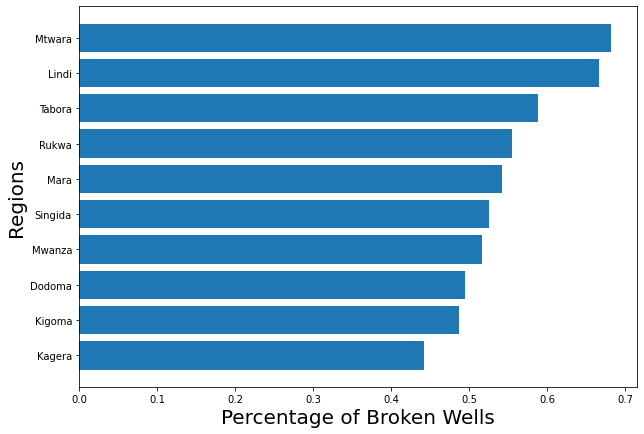

In [94]:
a = true_well_percent.values[:10]
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10,7))
ax.barh(true_well_percent.index[:10],a)
ax.invert_yaxis()

plt.xlabel("Percentage of Broken Wells", size = 20)
plt.ylabel("Regions", size = 20)

plt.savefig('Image/wells_broken_graph.jpg', transparent = False,bbox_inches="tight", dpi=500);
# Show plot
plt.show()

